In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator 

In [2]:
# Read in processed data
items_by_country = pd.read_csv('../data/processed/items_by_country.csv')
partners_by_country = pd.read_csv('../data/processed/partners_by_country.csv')

## 1. Inspecting aggregated data and look for potential problems

### 1.1 Find countries with high trading diversity
In terms of number of (1)items and (2)partner countries, respectively

In [3]:
def count_unique(df, col_name, variable):
    '''count unique entries of the variable for col_name (e.g., list of reporter countries).
    Export and Import groups are counted separately'''
    counts = []
    for country in df[col_name].unique():
        count_export = len(df.loc[(df[col_name]== country) & (df['Element'].str.startswith('Export')), variable].unique())
        count_import = len(df.loc[(df[col_name]== country) & (df['Element'].str.startswith('Import')), variable].unique())
        counts.append([country,count_export,count_import])

    count_df = pd.DataFrame(counts, columns=['Countries','Export','Import'])
    
    return count_df

In [4]:
# Count unique Items exported/imported by a country
itemscount_by_country = count_unique(items_by_country,'Reporter Countries','Item')

In [32]:
# Count unique Partners exported/imported with a country
partnerscount_by_country = count_unique(partners_by_country,'Reporter Countries','Partner Countries')

In [69]:
# Show top 10 countries with most numbers of exporting items
itemscount_by_country = itemscount_by_country.sort_values(by='Export',ascending=False)
itemscount_by_country.head(10)

,Countries,Export,Import
132,Poland,370,375
8,Austria,370,370
116,Netherlands,369,369
174,United Kingdom,366,365
63,France,366,365
69,Germany,365,366
173,United Arab Emirates,365,372
86,Italy,364,364
50,Denmark,364,363
15,Belgium,363,362


In [28]:
itemscount_by_country.describe()

,Export,Import
count,184.000000,184.000000
mean,267.788043,332.668478
std,93.621104,36.760841
min,11.000000,112.000000
25%,199.500000,323.000000
50%,306.500000,339.500000
75%,341.000000,356.000000
max,370.000000,376.000000


In [67]:
# Show top 10 countries with most numbers of exporting partners
partnerscount_by_country = partnerscount_by_country.sort_values(by='Export',ascending=False)
partnerscount_by_country.head(10)

,Countries,Export,Import
176,United States of America,238,234
135,Republic of Korea,224,233
161,Switzerland,227,232
32,Canada,232,232
86,Italy,231,229
132,Poland,225,229
155,South Africa,240,227
63,France,230,227
163,Thailand,244,227
88,Japan,210,227


In [35]:
partnerscount_by_country.describe()

,Export,Import
count,184.000000,184.000000
mean,147.663043,166.673913
std,65.005049,44.632956
min,6.000000,34.000000
25%,100.000000,138.500000
50%,158.000000,173.500000
75%,202.000000,200.250000
max,244.000000,234.000000


 **Summary:** There is a big difference in items diversity among countries, as well as in number of trading partner countries

### Visualization 

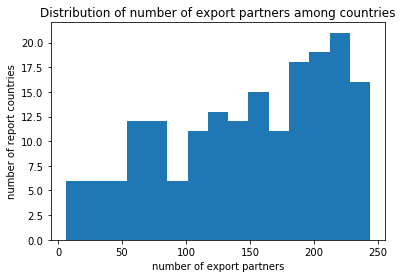

In [110]:
plt.hist(partnerscount_by_country['Export'],bins=15)
plt.title('Distribution of number of export partners among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of export partners')
plt.show()

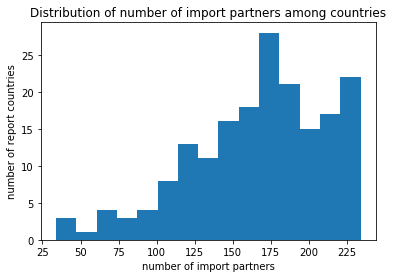

In [111]:
plt.hist(partnerscount_by_country['Import'],bins=15)
plt.title('Distribution of number of import partners among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of import partners')
plt.show()

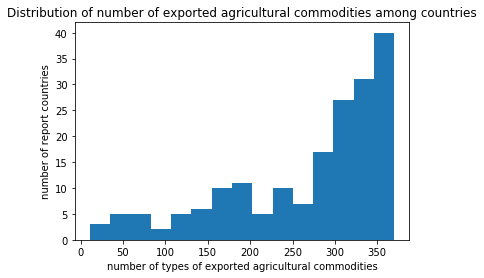

In [112]:
plt.hist(itemscount_by_country['Export'],bins=15)
plt.title('Distribution of number of exported agricultural commodities among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of types of exported agricultural commodities')
plt.show()

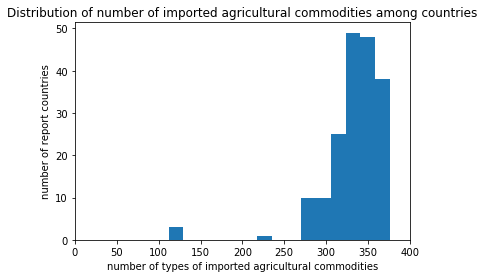

In [115]:
plt.hist(itemscount_by_country['Import'],bins=15)
plt.title('Distribution of number of imported agricultural commodities among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of types of imported agricultural commodities')
plt.xlim(0,400)
plt.show()

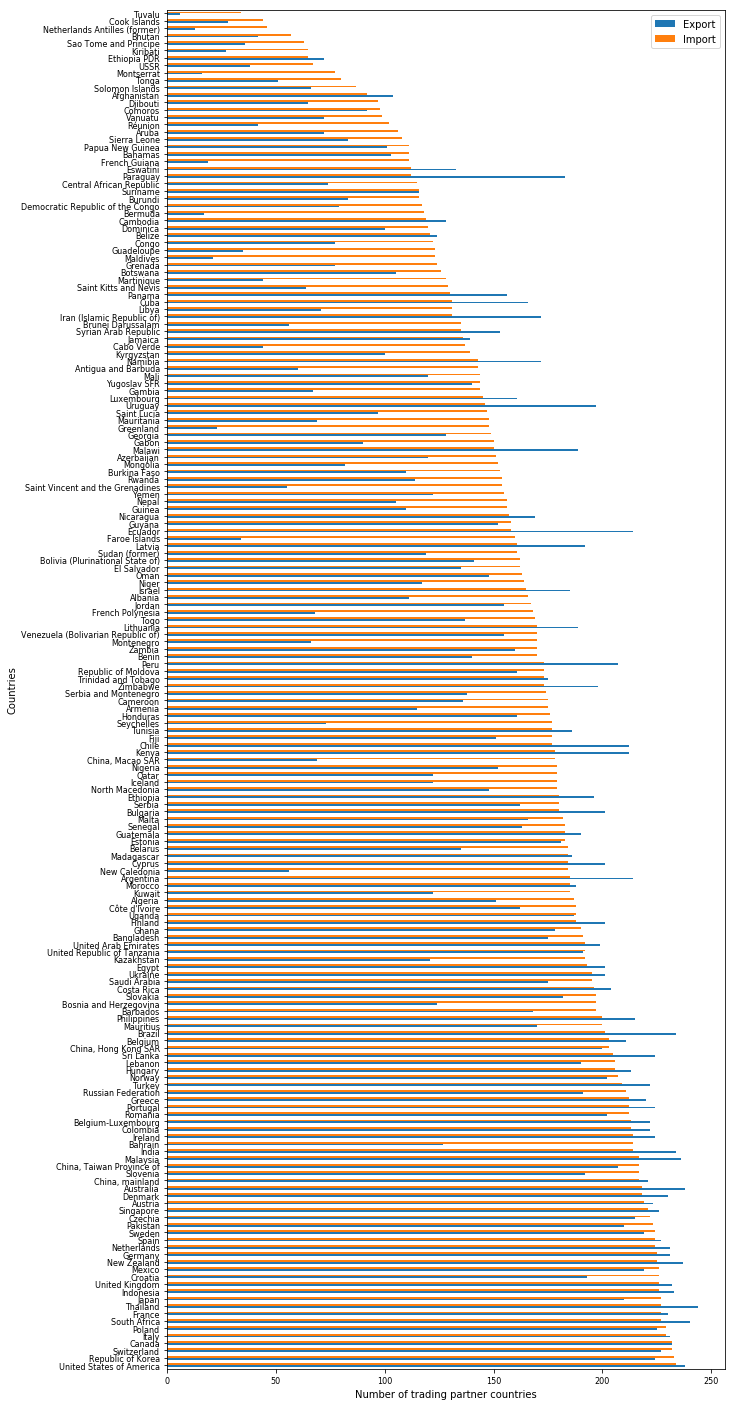

In [72]:
partnerscount_by_country.plot(x='Countries',kind='barh',fontsize= 8, figsize=(10,25))
plt.xlabel('Number of trading partner countries')
plt.show()

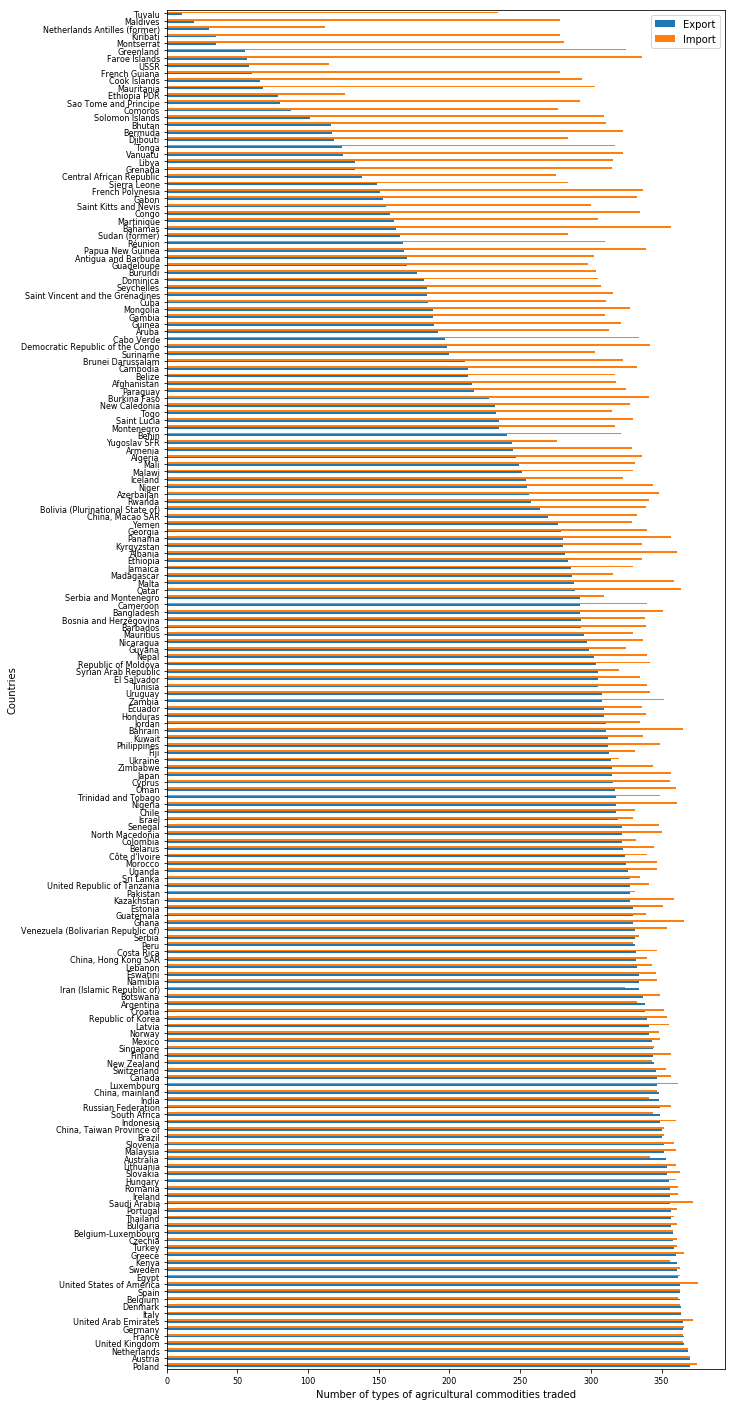

In [71]:
itemscount_by_country.plot(x='Countries',kind='barh',fontsize= 8, figsize=(10,25))
plt.xlabel('Number of types of agricultural commodities traded')
plt.show()

### 1.2 Filter data based on trading consistency (entries with more complete time series, i.e., more years of trading data)